<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/Detec%C3%A7%C3%A3o_Stress_dos_Funcion%C3%A1rios_Processamento_de_linguagem_natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

![](https://i.gifer.com/origin/98/98447b873b927d46f752e9e0fc9c2910_w200.gif)

>Estresse, ansiedade e depressão estão ameaçando a saúde mental das pessoas. Cada pessoa tem uma razão para ter uma vida estressante. 

>As pessoas costumam compartilhar seus sentimentos em plataformas de mídia social como no Instagram na forma de postagens e histórias, e no Reddit na forma de pedir sugestões sobre sua vida em subreddits. 

>Nos últimos anos, muitos criadores de conteúdo se apresentaram para criar conteúdo para ajudar as pessoas com sua saúde mental. 

>Muitas organizações podem usar a detecção de estresse para descobrir quais usuários de mídia social estão estressados ​​para ajudá-los rapidamente. 



#1° Problema de Negócio

![](https://thumbs.gfycat.com/WhirlwindQuarterlyAustraliansilkyterrier-size_restricted.gif)

>A detecção de estresse é uma tarefa desafiadora, pois existem tantas palavras que podem ser usadas pelas pessoas em suas postagens que podem mostrar se uma pessoa está com estresse psicológico ou não. 

>Ao procurar conjuntos de dados que eu possa usar para treinar um modelo de aprendizado de máquina para detecção de estresse, encontrei um conjunto de dados no Kaggle com 116 colunas. Só precisamos usar a coluna de texto e rótulo para esta tarefa.

>O conjunto de dados que estou usando para esta tarefa contém dados postados em subreddits relacionados à saúde mental. 

>Este conjunto de dados contém vários problemas de saúde mental compartilhados por pessoas sobre sua vida. Felizmente, esse conjunto de dados é rotulado como 0 e 1, onde **0 indica sem estresse e 1 indica estresse**. 

>Então, na seção abaixo, vou guiá-lo pela tarefa de detecção de estresse em postagens de mídia social usando Python.



# 2° Análise Exploratória dos Dados

![](https://camo.envatousercontent.com/dd7a05547fad094485012037f6b85014efec178a/68747470733a2f2f692e6962622e636f2f4d474d71634c542f302d746573742d72616e67652d322e676966)

In [3]:
# Conexão com os dados
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [5]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


# 3° Pré-Processamento dos Dados

![](https://i.gifer.com/origin/f9/f9889257dd191dc36b7d28d4578beeef.gif)

In [6]:
#Utilizando Pacotes de Processamento de Linguagem Natural
import nltk
import re


nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

from nltk.corpus import stopwords
import string


stopword=set(stopwords.words('english'))

def clean(text):

    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
  
    text = re.sub('https?://\S+|www\.\S+', '', text)
  
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  
    text = re.sub('\n', '', text)
  
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


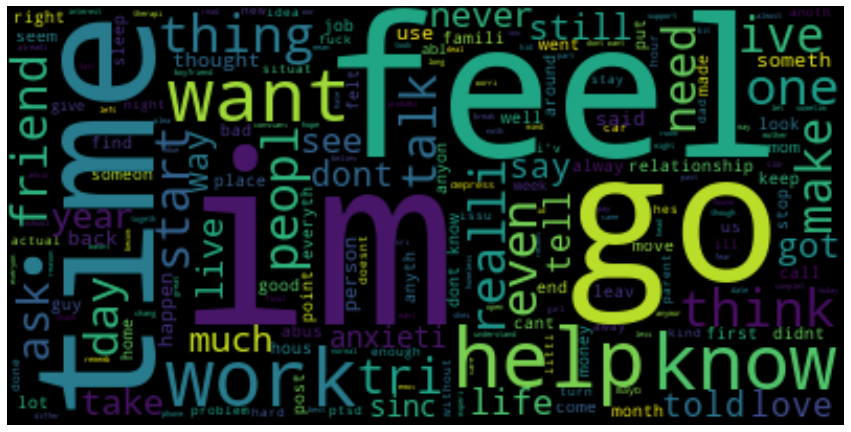

In [7]:
# Visualização de Dados com WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text)
                      
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# Transformação de Variáveis
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [9]:
data.text[0]

'said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic  hour'

In [10]:
# Separação dos Dados para Treinamento da Máquina Preditiva
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

#4° Máquinas Preditivas com Machine Learning


In [16]:
# Máquina Preditiva com Algoritmo Naivebayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

# 5° Avaliação da Máquina Preditiva

#### Frase Teste 1
***People need to take care of their mental health***

**Tradução** *texto em itálico*

As pessoas precisam cuidar da saúde mental...

In [17]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: People need to take care of their mental health
['No Stress']


#### Frase Teste 2
***Sometime I feel like I need some help***

**Tradução**

"Às vezes eu sinto que preciso de ajuda"...

In [22]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Sometime I feel like I need some help
['Stress']


#6° Implementação da Máquina Preditiva / Encaminhamento

> Marcação dos Funcionários que podem estar precisando de Ajuda

> Criação de Clusters (grupos) de Funcionários Parecidos com os detectados com stress

> Medidas preventivas a respeito das maiores queixas dos funcionários